In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

All_filename = "All.csv"  
df_all = pd.read_csv(All_filename)
Active_filename = "Active.csv"  
df_active = pd.read_csv(Active_filename)
Lazy_filename = "Lazy.csv"  
df_lazy = pd.read_csv(Lazy_filename)

# Plot

In [8]:
def plotESDvsCarga_V2(df, x, y, point_size=5, avg_marker_size=10, error_bar_thickness=1, 
                      title="Plot Title", xlabel="X-axis Label", ylabel="Y-axis Label"):
    """
    Plots data points from a DataFrame along with averages and standard deviations for each unique 'carga',
    and includes mean and standard deviation values in a legend-like table in the upper-right corner of the plot.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        x (str): Column name for the x-axis data.
        y (str): Column name for the y-axis data.
        point_size (int): Size of the data points.
        avg_marker_size (int): Size of the markers for the average values.
        error_bar_thickness (float): Thickness of the error bars.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    # Ensure the DataFrame contains the specified columns
    if x not in df.columns or y not in df.columns:
        print(f"Error: One or both columns '{x}' or '{y}' are not in the DataFrame.")
        return
    
    # Plot data points
    plt.plot(df[x], df[y], marker='.', linestyle='', markersize=point_size, color='green', label='_nolegend_')

    # Calculate average and standard deviation for each carga
    stats = df.groupby('carga')[y].agg(['mean', 'std']).reset_index()

    # Plot average values with error bars for standard deviation
    plt.errorbar(
        stats['carga'], stats['mean'], yerr=stats['std'],
        fmt='x', color='red', markersize=avg_marker_size,
        ecolor='black', elinewidth=error_bar_thickness, capsize=4,
        label='_nolegend_'
    )

    # Create the custom legend text with aligned header and data rows
    legend_text = f"{'Carga':<6} {'Promedio':<10} {'STD':<6}\n" + "\n".join(
        [f"{int(row['carga']):<6} {row['mean']:<10.2f} {row['std']:<6.2f}" for _, row in stats.iterrows()]
    )

    # Place the legend in the upper-right corner of the plot area
    ax = plt.gca()  # Get the current Axes instance
    ax.text(
        0.95, 0.95, legend_text, transform=ax.transAxes, family="monospace",
        ha="right", va="top", bbox=dict(facecolor='white', alpha=0.7)
    )

    # Customize plot appearance
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)  
    plt.title(title)
    plt.grid(True)

    plt.show()

# All

In [16]:
df_all = pd.read_csv(All_filename)

df_all = df_all[df_all['Filename'] != 'CAMV100W.txt']
new_order = ['Filename',
             'Rest Mean','Rest Std',
             'Exercise Mean','Exercise Std',
             'Recovery Mean', 'Recovery Std',
             'Rest SD1', 'Rest SD2',
             'Exercise SD1','Exercise SD2',
             'Recovery SD1', 'Recovery SD2',
            ]  
df_all= df_all.reindex(columns=new_order)
#df_all_dropped = df_all.drop(df_all.columns[0], axis=1)
df_all['carga'] = df_all['Filename'].str.extract(r'(\d+)')

cols = df_all.columns.tolist()  # Get a list of column names
cols.insert(1, cols.pop(cols.index('carga')))  # Move 'carga' to the second position
# Apply the new order
df_all= df_all[cols]
values = ['400','130','160','300','350']

df_all = df_all[~df_all['carga'].isin(values)]
df_all['carga'] = df_all['carga'].astype(int)

df_all = df_all.sort_values(by='carga', ascending=True)

df_all = df_all[~((df_all['carga'] == 50) & (df_all['Exercise SD2'] > 110))]

df_all = df_all[~((df_all['carga'] == 100) & (df_all['Exercise SD2'] > 80))]

df_all = df_all[~((df_all['carga'] == 200) & (df_all['Exercise SD2'] > 60))]

df_all = df_all[~((df_all['carga'] == 250) & (df_all['Exercise SD2'] > 60))]


df_all = df_all[~((df_all['carga'] == 50) & (df_all['Exercise SD1'] > 60))]

df_all = df_all[~((df_all['carga'] == 100) & (df_all['Exercise SD1'] > 40))]

df_all = df_all[~((df_all['carga'] == 150) & (df_all['Exercise SD1'] > 30))]

df_all = df_all[~((df_all['carga'] == 200) & (df_all['Exercise SD1'] > 100))]

df_all = df_all[~((df_all['carga'] == 250) & (df_all['Exercise SD1'] > 100))]

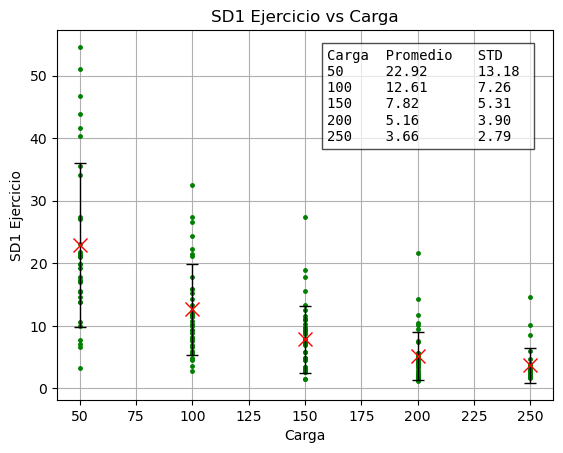

In [17]:
# Example usage
plotESDvsCarga_V2(
    df_all, 
    x="carga", 
    y="Exercise SD1", 
    title="SD1 Ejercicio vs Carga", 
    xlabel="Carga", 
    ylabel="SD1 Ejercicio"
)

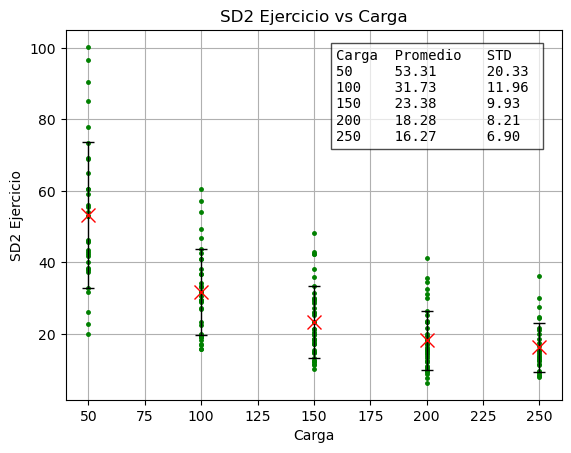

In [18]:
# Example usage
plotESDvsCarga_V2(
    df_all, 
    x="carga", 
    y="Exercise SD2", 
    title="SD2 Ejercicio vs Carga", 
    xlabel="Carga", 
    ylabel="SD2 Ejercicio"
)